In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from glob import glob

In [5]:
chromo = 10

In [6]:
alphas = [75, 108]

df = pd.DataFrame()

for alpha in alphas:
    gammas = [50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180]

    for gamma in gammas:
        basename = f"output/A1_chr{chromo}_gamma{gamma}_alpha{alpha}"
        try:
            df1 = pd.read_csv(f"{basename}_0.txt", sep=" ", comment="#").set_index("node_id")
        except:
            continue
        df1 = df1.rename({"level 1": "robustness"}, axis=1)
        df1["$\gamma$"] = gamma/100
        df1["$\\alpha$"] = alpha/100
        df = pd.concat([df, df1])

df["fringeness"] = 1 - df.robustness
df.head()

,path,robustness,$\gamma$,$\alpha$,fringeness
node_id,,,,,
1299,1;,0.205882,1.15,0.75,0.794118
2,1,0.950000,1.15,0.75,0.050000
3,1,0.950000,1.15,0.75,0.050000
4,1,0.950000,1.15,0.75,0.050000
5,1,0.950000,1.15,0.75,0.050000


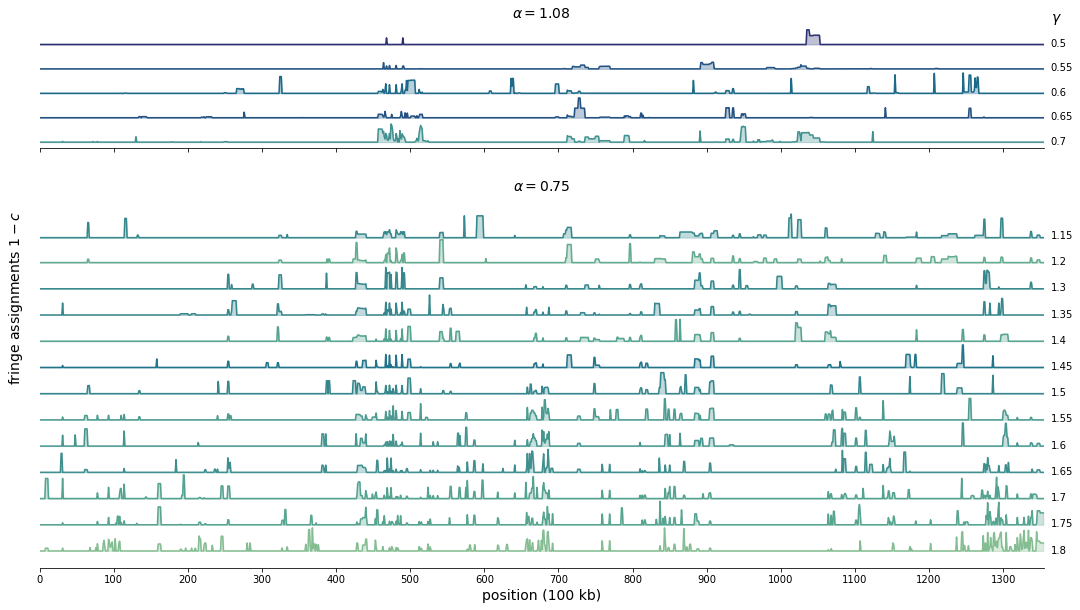

In [8]:
fig, axs = plt.subplots(nrows=2,
                        sharex=True, sharey=False,
                        gridspec_kw={'height_ratios': [1, 3]},
                        figsize=(18, 10))

cmap = sns.color_palette("crest", as_cmap=True)
font_size = 14

for i, ax in enumerate(axs):
    alpha = 0.75 if i == 1 else 1.08
    rows = df[df["$\\alpha$"] == alpha]    
    gammas = rows["$\gamma$"].unique()
    ax.set_yticks([])
    
    for j, gamma in enumerate(sorted(gammas, reverse=True)):
        series = rows[rows["$\gamma$"] == gamma].sort_index()
        cc = 1 - (series[series.fringeness > 0.2].fringeness.count() - 20) / 170
        c = cmap(cc)
        ax.plot(series.index,
                (series.fringeness + j) / len(gammas),
                label=gamma, c=c)
        ax.fill_between(series.index, (series.fringeness + j) / len(gammas), (series.fringeness.min() + j) / len(gammas), alpha=0.3, color=c)
        ax.text(series.index.max() + 10, j / len(gammas), gamma)

    if i == 0:
        ax.text(rows.index.max() + 10, (j + 1) / len(gammas), "$\gamma$", fontsize=font_size)
        
sns.despine(left=True)

axs[0].set_title("$\\alpha = 1.08$", fontsize=font_size)
axs[1].set_title("$\\alpha = 0.75$", fontsize=font_size)
fig.text(0.1, 0.5, "fringe assignments $1-c$", rotation="vertical", fontsize=font_size, verticalalignment="center")

plt.xticks(list(range(0, 1355, 100)))
plt.xlim(0, 1355)
plt.xlabel("position (100 kb)", fontsize=font_size)

plt.savefig("results/tmp.png", bbox_inches="tight", dpi=300)
plt.savefig("results/fringeness.pdf", bbox_inches="tight")
